### 1)Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 2)Read the data as a data frame using pandas

In [2]:
bank=pd.read_csv("bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1.0,-1.0,0.0,unknown,no


### 3) Shape of the data

In [3]:
bank.shape

(37902, 17)

### 4)Data type of each attribute

In [4]:
bank.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

In [5]:
bank.rename(columns={'y':'Target'},inplace=True)
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1.0,-1.0,0.0,unknown,no


### 5)Checking the presence of missing values

In [6]:
bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign      True
pdays         True
previous      True
poutcome      True
Target        True
dtype: bool

### 6)5 point summary of numerical attributes

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37902.0,40.774445,9.598387,19.0,33.0,39.0,48.0,95.0
balance,37902.0,1271.518627,2873.266389,-8019.0,52.0,406.0,1316.0,98417.0
day,37902.0,16.008601,8.365139,1.0,8.0,17.0,21.0,31.0
duration,37902.0,255.774788,260.234044,0.0,100.0,175.0,314.0,4918.0
campaign,37901.0,2.905306,3.294127,1.0,1.0,2.0,3.0,63.0
pdays,37901.0,27.834886,84.587741,-1.0,-1.0,-1.0,-1.0,371.0
previous,37901.0,0.369040,2.074364,0.0,0.0,0.0,0.0,275.0


### 7)checking for class imbalance

In [8]:
no,yes=bank.Target.value_counts()
bank.Target.value_counts()

no     35326
yes     2575
Name: Target, dtype: int64

**Given data set is highly imbalanced, i.e. number of data belonging to 'no' category is way higher than 'yes' category.**

In [9]:
bank['Target'].value_counts(normalize=True)

no     0.93206
yes    0.06794
Name: Target, dtype: float64

##### The response rate is only 11.6%. Hence the Y(Target) variable has a high class imbalance. Hence accuracy will not be a reliable model performance measure. 

##### FN is very critical for this business case because a false negative is a customer who will potentially subscribe for a loan but who has been classified as 'will not subscribe'. Hence the most relevant model performance measure is recall

### 8)Checking the presence of outliers

##### For Age

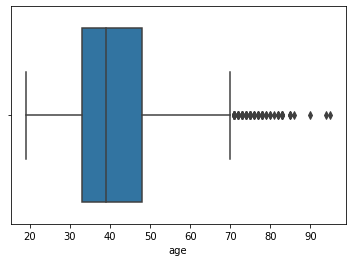

In [19]:
sns.boxplot(bank.age)

**Age column has some outliers. The median age is about 39 years. There are some customers above 90 years of age. This data might have to be checked to remove outliers**

In [20]:
# Quartiles
print('1º Quartile: ', bank['age'].quantile(q = 0.25))
print('2º Quartile: ', bank['age'].quantile(q = 0.50))
print('3º Quartile: ', bank['age'].quantile(q = 0.75))
print('4º Quartile: ', bank['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank['age'].quantile(q = 0.75) + 
                      1.5*(bank['age'].quantile(q = 0.75) - bank['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
Ages above:  70.5 are outliers


In [12]:
print('Numerber of outliers: ', bank[bank['age'] > 70.5]['age'].count())
print('Number of rows: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['age'] > 70.5]['age'].count()*100/len(bank),2), '%')

Numerber of outliers:  79
Number of rows:  37902
Outliers are: 0.21 %


##### For Duration

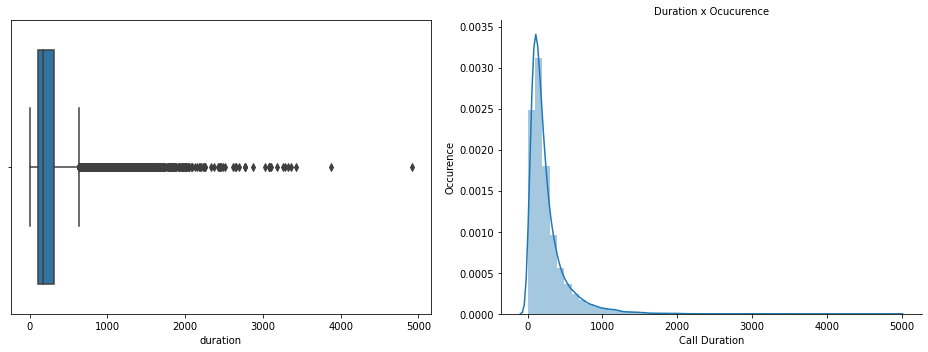

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank, orient = 'v', ax = ax1)
ax1.tick_params(labelsize=10)

sns.distplot(bank['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Call Duration', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [14]:
print("Max duration  call in minutes:  ", round((bank['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank['duration'].mean()/60),1))
print("STD dev of duration  call in minutes:   ", round((bank['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD dev of duration  call in minutes:    4.3


In [15]:
# Quartiles
print('1º Quartile: ', bank['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank['duration'].quantile(q = 0.75) + 
                      1.5*(bank['duration'].quantile(q = 0.75) - bank['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  100.0
2º Quartile:  175.0
3º Quartile:  314.0
4º Quartile:  4918.0
Duration calls above:  635.0 are outliers


In [16]:
print('Numerber of outliers: ', bank[bank['duration'] > 644.5]['duration'].count())
print('Number of rows: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['duration'] > 644.5]['duration'].count()*100/len(bank),2), '%')

Numerber of outliers:  2731
Number of rows:  37902
Outliers are: 7.21 %


In [17]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4.0,-1.0,0.0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15.0,-1.0,0.0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2.0,-1.0,0.0,unknown,no


In [21]:
bank=bank[(bank['duration'] != 0)]

### 9)Plots

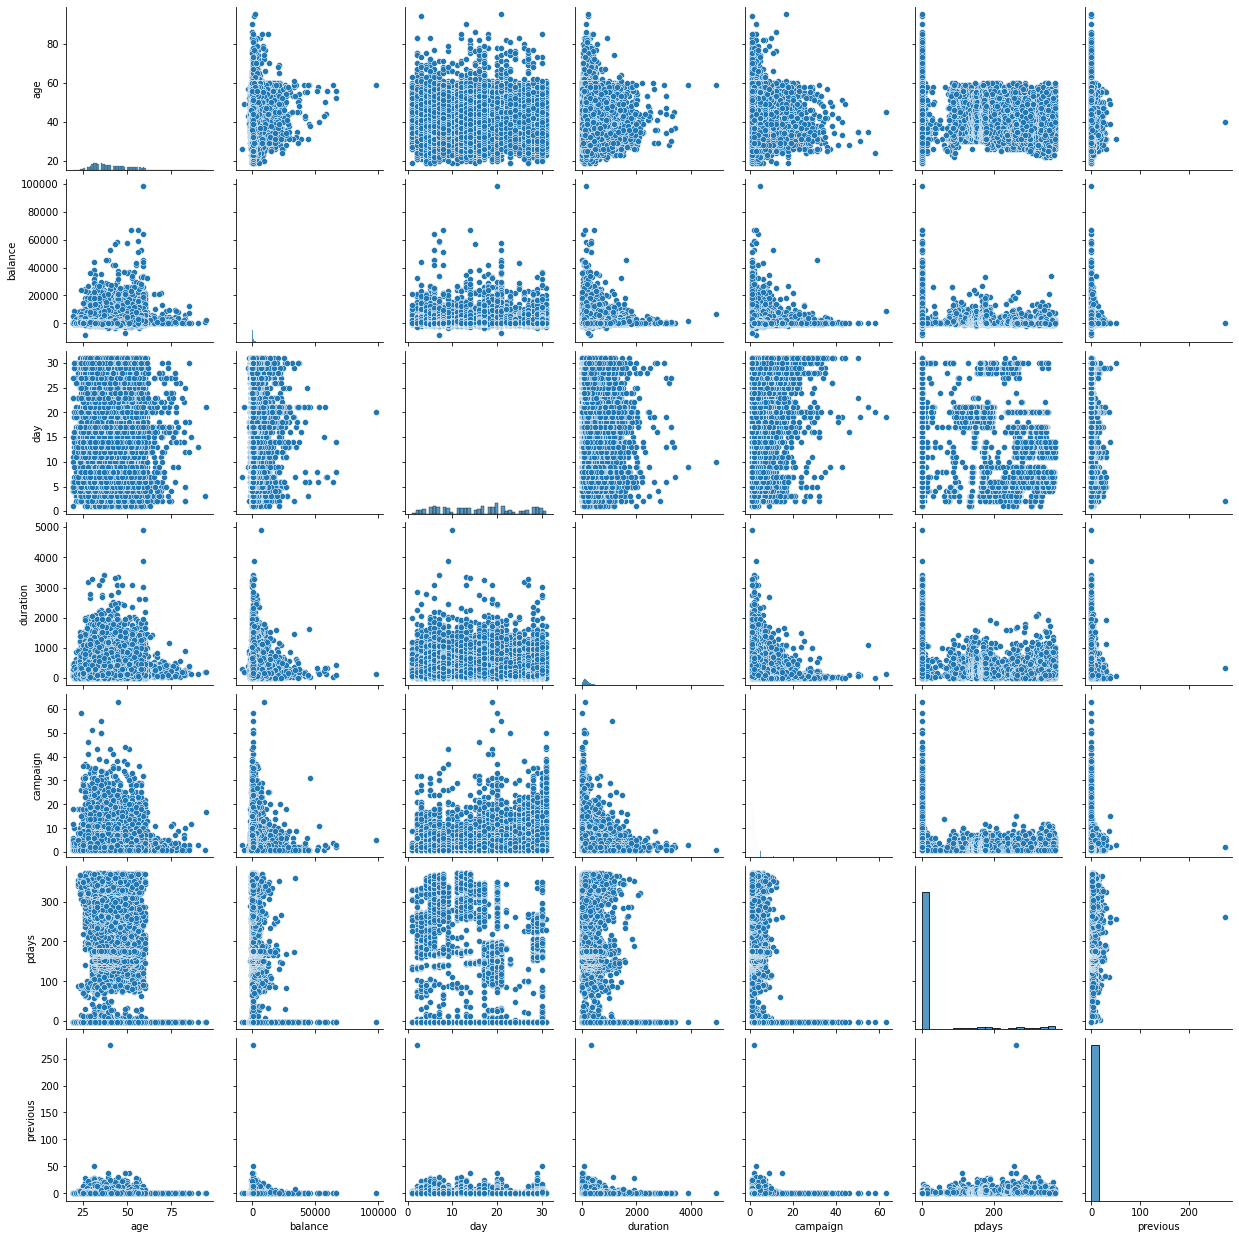

In [22]:
#histograms from the pair plots
sns.pairplot(data= bank)
plt.show()

In [ ]:
sns.pairplot(data= bank, hue='Target')
plt.show()

In [ ]:
plt.figure(figsize=(15, 14))
sns.heatmap(bank.corr(),annot=True, cmap= 'Greens' )

**The distribution of all numerical variables other than age is highly skewed - hence we might want to transform or bin some of these variables**

**On similar lines, we will perform univariate analysis of other numerical variables**

#### Univariate analysis - countplot / value count for categorical variables


In [ ]:
bank['job'].value_counts()

In [ ]:
sns.countplot(bank['marital'])

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(bank['education'])

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(bank['default'])

In [ ]:
sns.countplot(bank['housing'])

In [ ]:
sns.countplot(bank['loan'])

In [ ]:
sns.countplot(bank['contact'])

In [ ]:
sns.countplot(bank['poutcome'])

In [ ]:
sns.countplot(bank['Target'])

### Bivariate analysis

In [ ]:
#Group numerical variables by mean for the classes of Y variable
np.round(bank.groupby(["Target"]).mean() ,1)

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.8,1303.7,15.9,221.2,2.8,36.4,0.5
yes,41.7,1804.3,15.2,537.3,2.1,68.7,1.2


#### The mean balance is higher for customers who subscribe to the term deposit compared to those who dont


#### number of days that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed

#### number of contacts performed before this campaign is also higher for customers who subscribe

##### All of the above facts indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit

### Bivariate analysis using crosstab

In [ ]:
pd.crosstab(bank['job'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
job,,
student,0.713220,0.286780
retired,0.772085,0.227915
unemployed,0.844973,0.155027
management,0.862430,0.137570
admin.,0.877973,0.122027
self-employed,0.881571,0.118429
unknown,0.881944,0.118056
technician,0.889415,0.110585
services,0.911170,0.088830


##### The highest conversion is for students (28%) and lowest is for blue-collar(7%)

In [ ]:
pd.crosstab(bank['marital'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
marital,,
single,0.850508,0.149492
divorced,0.880545,0.119455
married,0.898754,0.101246


In [ ]:
pd.crosstab(bank['education'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
education,,
tertiary,0.849936,0.150064
unknown,0.864297,0.135703
secondary,0.894397,0.105603
primary,0.913723,0.086277


In [ ]:
print(pd.crosstab(bank['default'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False ))
print(bank['default'].value_counts(normalize=True))

Target         no       yes
default                    
no       0.882031  0.117969
yes      0.936196  0.063804
no     0.981972
yes    0.018028
Name: default, dtype: float64


In [ ]:
pd.crosstab(bank['housing'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
housing,,
no,0.832968,0.167032
yes,0.922994,0.077006


In [ ]:
pd.crosstab(bank['loan'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
loan,,
no,0.873436,0.126564
yes,0.933177,0.066823


In [ ]:
pd.crosstab(bank['contact'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
contact,,
cellular,0.850801,0.149199
telephone,0.865795,0.134205
unknown,0.959290,0.040710


In [ ]:
pd.crosstab(bank['month'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
month,,
mar,0.480084,0.519916
dec,0.532710,0.467290
sep,0.535406,0.464594
oct,0.562331,0.437669
apr,0.803206,0.196794
feb,0.833522,0.166478
aug,0.889850,0.110150
jun,0.897772,0.102228
nov,0.898489,0.101511


### Listing out the high level findings from bivariate analysis that could provide pointers to feature selection


In [ ]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [ ]:
#Binning campaign
cut_points = [2,3,4]
labels = ["<=2","3","4",">4"]
bank['campaign_range'] = binning(bank['campaign'], cut_points, labels)
bank['campaign_range'].value_counts()

<=2    30048
>4      6118
3       5521
4       3521
Name: campaign_range, dtype: int64

In [ ]:
bank.drop(['campaign'], axis=1, inplace=True)
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'pdays', 'previous',
       'poutcome', 'Target', 'campaign_range'],
      dtype='object')

In [ ]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank);

In [ ]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank);

#### Split data into train/test

In [ ]:
X = bank.drop("Target" , axis=1)
y = bank["Target"]   # select all rows and the 17 th column which is the classification "Yes", "No"
X = pd.get_dummies(X,drop_first=True)
y=y.replace(['yes','no'],[1,0])

In [ ]:
test_size = 0.30 # taking 70:30 training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
k_fold = KFold(n_splits=10, shuffle=True, random_state=7)

#### Applying multiple models by fitting train data

#### Decision Tree Classifier

[[11081   927]
 [  836   719]]
87.0


Text(0.5, 1.0, 'DecisionTreeClassifier')

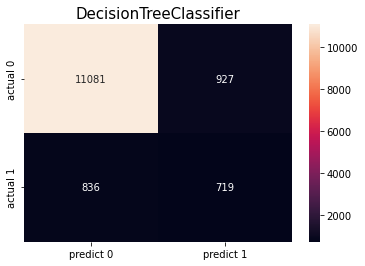

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1) #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

cm=confusion_matrix(y_test, dtreepred)
print(cm)
print(round(accuracy_score(y_test, dtreepred),2)*100)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])
plt.title("DecisionTreeClassifier", fontsize =15)

In [ ]:
#classification Metrics
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
DTREECV_Recall=recall_score(y_test, dtreepred)
DTREECV_F1=f1_score(y_test, dtreepred)
DTREECV_Pre=precision_score(y_test,dtreepred)

#### Random Forest classifier

[[11648   360]
 [  960   595]]
90.0


Text(0.5, 1.0, 'RandomForestClassifier')

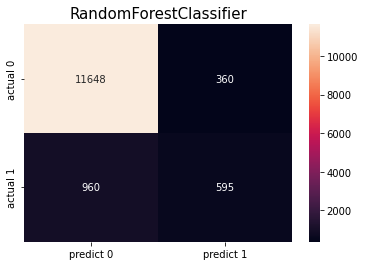

In [ ]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
cm=confusion_matrix(y_test, rfcpred )
print(cm)
print(round(accuracy_score(y_test, rfcpred),2)*100)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])
plt.title("RandomForestClassifier", fontsize =15)

In [ ]:
#classification Metrics
RFCCV_Recall=recall_score(y_test, rfcpred)
RFCCV_Pre=precision_score(y_test, rfcpred)
RFCCV_F1=f1_score(y_test, rfcpred)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

#### Ensemble Learning - Bagging

In [ ]:
bgcl = BaggingClassifier(base_estimator=dtree, n_estimators=200,random_state=5)
bgcl = bgcl.fit(X_train, y_train)

0.9017179090171791
Accuracy score is  90.0
[[11524   484]
 [  849   706]]


Text(0.5, 1.0, 'BaggingClassifier')

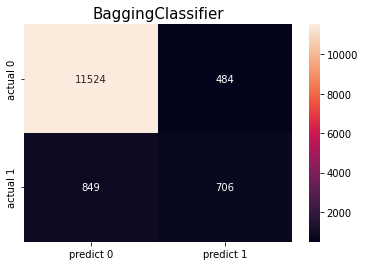

In [ ]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print("Accuracy score is ",round(accuracy_score(y_test, rfcpred),2)*100)
cm=confusion_matrix(y_test, y_predict)
print(cm)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])
plt.title("BaggingClassifier", fontsize =15)

In [ ]:
#classification Metrics
BAGCV= (cross_val_score(bgcl, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
BAGCV_Recall=recall_score(y_test, y_predict)
BAGCV_Pre=precision_score(y_test, y_predict)
BAGCV_F1=f1_score(y_test, y_predict)

#### Ensemble Learning - GradientBoost

[[11664   344]
 [  960   595]]
90.0


Text(0.5, 1.0, 'GradientBoostingClassifier')

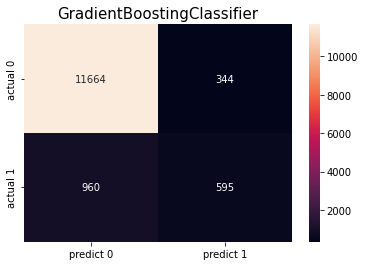

In [ ]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
cm=confusion_matrix(y_test, gbkpred )
print(cm)
print(round(accuracy_score(y_test, gbkpred),2)*100)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])
plt.title("GradientBoostingClassifier", fontsize =15)

In [ ]:
#classification Metrics
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
GBKCV_Recall=recall_score(y_test, gbkpred)
GBKCV_Pre=precision_score(y_test, gbkpred)
GBKCV_F1=f1_score(y_test, gbkpred)

#### Lets Compare performances of all the models using multiple evaluation metrics for classification

In [ ]:
#Precision value scores
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier','Bagging','Gradient Boosting'],
                'Score':  [RFCCV_Pre, DTREECV_Pre,BAGCV_Pre ,GBKCV_Pre]})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Gradient Boosting,0.644013
0,Random Forest Classifier,0.630040
2,Bagging,0.591606
1,Decision Tree Classifier,0.441392


In [ ]:
#F1 Scores
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier','Bagging','Gradient Boosting'],
                'Score':  [RFCCV_F1, DTREECV_F1,BAGCV_F1 ,GBKCV_F1]})

models.sort_values(by='Score', ascending=False)

,Models,Score
2,Bagging,0.526959
0,Random Forest Classifier,0.493097
3,Gradient Boosting,0.483401
1,Decision Tree Classifier,0.454574


In [ ]:
#Recall scores
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier','Bagging','Gradient Boosting'],
                'Score':  [RFCCV_Recall, DTREECV_Recall,BAGCV_Recall ,GBKCV_Recall]})

models.sort_values(by='Score', ascending=False)

,Models,Score
2,Bagging,0.475049
1,Decision Tree Classifier,0.468568
0,Random Forest Classifier,0.405055
3,Gradient Boosting,0.386909


***Here we have a class imbalance and there are major 'no' cases, so recall will be a good measure of performance and also our aim is to predict if the client will subscribe (yes/no) a term deposit and so our goal is to capture as many as subscribers even if we are not very sure.***

### Hence as per the recall scores Bagging and Decision Tree Classifier performs best in this case and the order follows as above.

In [ ]:
#Accuracy scores
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier','Bagging','Gradient Boosting'],
                'Score':  [RFCCV*100, DTREECV*100,BAGCV*100,GBKCV*100]})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Gradient Boosting,90.282817
0,Random Forest Classifier,90.102672
2,Bagging,89.935229
1,Decision Tree Classifier,86.920538
